In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt



KeyboardInterrupt



In [10]:
Image_size =256
Batch_size = 33
channels = 3
epochs = 10

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"C:\\Users\\Arush\\potato-disease\\training\\pepper_bell",
    labels = "inferred",
    color_mode='rgb',
    batch_size = Batch_size,
    image_size  = (Image_size,Image_size),
    shuffle = True
)

Found 2475 files belonging to 2 classes.


In [12]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [13]:
len(dataset)

75

In [14]:
75*33


2475

In [15]:
for image,labels in dataset.take(1):
    print(image.numpy())
    print(labels)

[[[[159. 147. 171.]
   [149. 137. 161.]
   [162. 150. 174.]
   ...
   [141. 127. 152.]
   [117. 103. 128.]
   [143. 129. 154.]]

  [[198. 186. 210.]
   [145. 133. 157.]
   [172. 160. 184.]
   ...
   [109.  95. 120.]
   [ 98.  84. 109.]
   [139. 125. 150.]]

  [[182. 170. 194.]
   [161. 149. 173.]
   [142. 130. 154.]
   ...
   [135. 121. 146.]
   [105.  91. 116.]
   [165. 151. 176.]]

  ...

  [[121. 104. 123.]
   [183. 166. 185.]
   [ 94.  77.  96.]
   ...
   [137. 114. 132.]
   [148. 125. 143.]
   [101.  78.  96.]]

  [[159. 142. 161.]
   [155. 138. 157.]
   [127. 110. 129.]
   ...
   [110.  87. 105.]
   [108.  85. 103.]
   [ 96.  73.  91.]]

  [[115.  98. 117.]
   [121. 104. 123.]
   [157. 140. 159.]
   ...
   [ 80.  57.  75.]
   [103.  80.  98.]
   [131. 108. 126.]]]


 [[[114. 103. 107.]
   [140. 129. 133.]
   [151. 140. 144.]
   ...
   [130. 120. 119.]
   [120. 110. 109.]
   [112. 102. 101.]]

  [[138. 127. 131.]
   [139. 128. 132.]
   [137. 126. 130.]
   ...
   [124. 114. 113.]
 

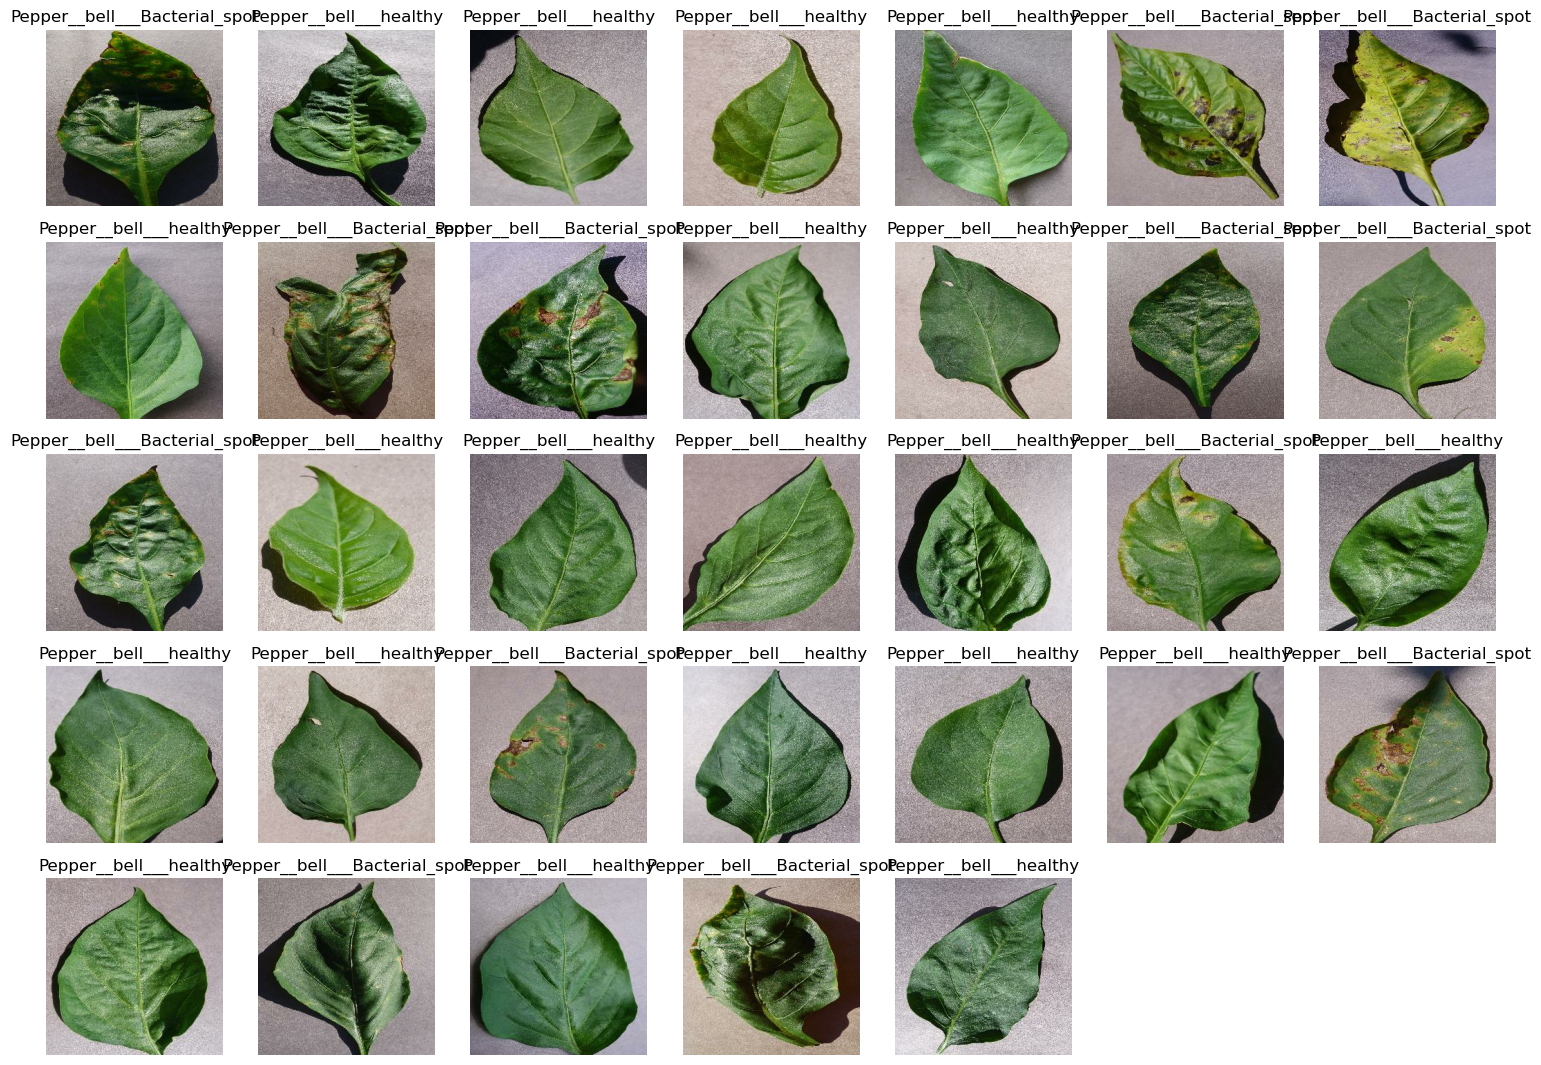

In [16]:
plt.figure(figsize=(15, 15))  # Adjust figure size as needed


for images , labels  in dataset.take(1):
    for i in range(images.shape[0]):
        ax = plt.subplot(7,7,i+1)
        plt.imshow(images [i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [17]:
tot_smaples = len(dataset)
tot_smaples

75

In [18]:
training_samples = int (tot_smaples*0.7)
training_samples

52

In [19]:
remain_samples = tot_smaples - training_samples
remain_samples

23

In [20]:
validation_samples = int(tot_smaples*0.2)
validation_samples

15

In [21]:
test_samples = int(tot_smaples*0.1)
test_samples

7

In [22]:
training_set = dataset.take(training_samples)
# print(len(validation_set)) #checked 
print(len(dataset))

NameError: name 'validation_set' is not defined

In [34]:
after_training = dataset.skip(training_samples)
len(after_training)

23

In [36]:
validation_set = after_training.take(15)
len(validation_set)

15

In [38]:
testing_set = after_training.take(7)
len(testing_set)

7

In [40]:
training_set = training_set.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_set =validation_set.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
testing_set = testing_set.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [42]:
resize_and_rescale = tf.keras.Sequential(
    [layers.Resizing(Image_size,Image_size),layers.Rescaling(1.0/255)]
)

In [44]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
    tf.keras.layers.GaussianNoise(0.1) 
])

In [48]:
Image_size = 256
channels = 3
n_classes = 2  # Number of classes: healthy, late_blight, early_blight

# Create the Sequential model
model = models.Sequential([
    resize_and_rescale,  # Rescaling layer
    data_augmentation,    # Data augmentation layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape = (256,256,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),  
])

# Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


ValueError: Sequential model 'sequential' has no defined input shape yet.

In [50]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

NameError: name 'model' is not defined

In [ ]:
history = model.fit(
    training_set,
    batch_size=33,
    validation_data=validation_set,
    verbose=1,
    epochs=10,
)

In [ ]:
model.accuracy()